In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# Data PreProcessing

In [7]:
#loading the dataset
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#put the data in pandas DataFrames
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
#to select any column
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [13]:
features['TAX']

0      296.0
1      242.0
2      242.0
3      222.0
4      222.0
       ...  
501    273.0
502    273.0
503    273.0
504    273.0
505    273.0
Name: TAX, Length: 506, dtype: float64

In [15]:
#load the target ie PRICE column into another dataframe
target=pd.DataFrame(boston.target,columns=['targetprice'])
target

,targetprice
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
#let us know what is the max and min value of the price
# syntax: max(dataframe_object[column_name])

print(max(target['targetprice']))

print(min(target['targetprice']))

50.0
5.0


In [19]:
#Now concatenate features and target to make a single dataframe
df=pd.concat([features,target],axis=1)     #axis=1 for concatenating column wise
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targetprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Data Visualization 

In [21]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targetprice
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [23]:
#calculate correlation
corr = df.corr('pearson')
#print(corr)
corrs=[abs(corr[attr]['targetprice']) for attr in list(features)]
#print(corrs)

#making a list of pairs [(corr,feature)]
l=list(zip(corrs,list(features)))
print(l)

# #sorting the list of pairs in reverse/descending order
l.sort(key=lambda x:x[0],reverse=True)
print(l)

# #UnZip
corrs,labels = list(zip((*l)))
print(list(zip((*l))))


[(0.3883046085868114, 'CRIM'), (0.3604453424505447, 'ZN'), (0.483725160028373, 'INDUS'), (0.1752601771902975, 'CHAS'), (0.4273207723732817, 'NOX'), (0.6953599470715389, 'RM'), (0.3769545650045959, 'AGE'), (0.24992873408590394, 'DIS'), (0.3816262306397776, 'RAD'), (0.46853593356776646, 'TAX'), (0.507786685537561, 'PTRATIO'), (0.33346081965706653, 'B'), (0.7376627261740143, 'LSTAT')]
[(0.7376627261740143, 'LSTAT'), (0.6953599470715389, 'RM'), (0.507786685537561, 'PTRATIO'), (0.483725160028373, 'INDUS'), (0.46853593356776646, 'TAX'), (0.4273207723732817, 'NOX'), (0.3883046085868114, 'CRIM'), (0.3816262306397776, 'RAD'), (0.3769545650045959, 'AGE'), (0.3604453424505447, 'ZN'), (0.33346081965706653, 'B'), (0.24992873408590394, 'DIS'), (0.1752601771902975, 'CHAS')]
[(0.7376627261740143, 0.6953599470715389, 0.507786685537561, 0.483725160028373, 0.46853593356776646, 0.4273207723732817, 0.3883046085868114, 0.3816262306397776, 0.3769545650045959, 0.3604453424505447, 0.33346081965706653, 0.249928

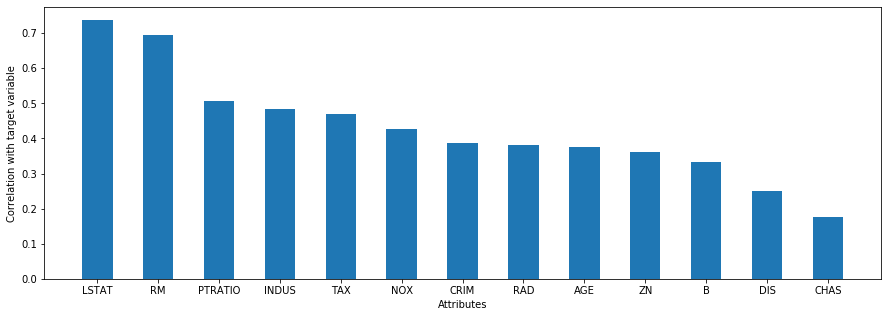

In [25]:
#plot correlations w.r.t target variable as bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
#if     plt.bar(index,corrs,width=0.5)
#then   plt.xticks(index,labels)
plt.bar(labels,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable')
plt.show()                       # and the result is LSTAT is the required attribute(independent variable for linear regression)

### Normalization of Data

In [27]:
X=df['LSTAT'].values
Y=df['targetprice'].values

x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1)) 
X=X[:,-1]

y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]



## Splitting the Data

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
#0.2 indicates that 20% of the data is randomly sampled as testing data

# Gradient Descent Algorithm

In [31]:
#Gradient Descent Algorithm is implemented with three functions
# 1.Update Function
# 2.Error Function
# 3.Gradient Descent Function

In [33]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m-grad_m*learning_rate
    c = c-grad_c*learning_rate
    return m,c

In [35]:
#defining error(Mean Squared Error)
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*(1/(2*N))

In [37]:
#init_m and init_c are the initial values of slope and y-intercept which is required as a first step for Gradient Descent Algorithm.
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e < error_threshold:
            print('Error less than threshold.Stopping gradient descent')
            break
        error_values.append(e)               #this list will tell how error is minimizing.
        m,c=update(m,x,c,t,learning_rate)   
        mc_values.append((m,c))               #this list will show how alues of m and c are being updated.
    return m,c,error_values,mc_values

In [39]:
%%time
                         #magic function to record time taken to run this cell
init_m = -0.5
init_c = 0
iterations=250
learning_rate = 0.001             #if learning rate>=0.0025 the model will cause overfitting(specific for this dataset only)
error_threshold = 0.0001

m,c,error_values,mc_values = gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Wall time: 121 ms


In [41]:
len(mc_values)

250

# Visualisation of model training

In [43]:
mc_values_anim = mc_values[0:250:5]

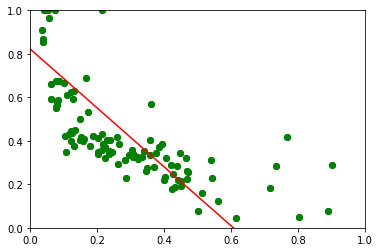

In [45]:
fig,ax = plt.subplots()
ln, = plt.plot([], [], 'ro-', animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln, 



def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1 = -0.5,m*(-0.5)+c
    x2,y2 = 1.5,m*1.5+c
    ln.set_data([x1,y1],[x2,y2])
    return ln, 



anim = FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)

HTML(anim.to_html5_video())

## Error Visualisation

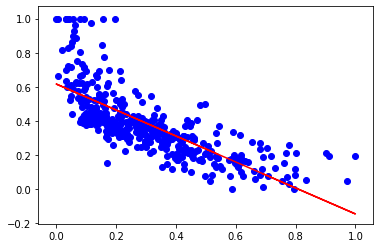

In [47]:
#plotting the regression line upon the training data set

plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')

Text(0.5, 0, 'Iterations')

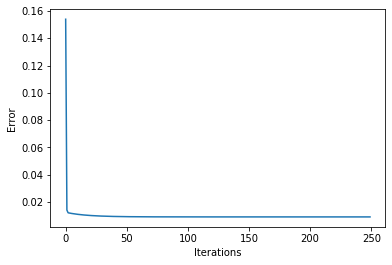

In [49]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

# PREDICTION !        ^_^

In [51]:
#Calculating the predictions on the test set as a vectorized operation
predicted = (m*xtest)+c

In [53]:
#Calculating MSE for predicted values on testing data

mean_squared_error(ytest,predicted)

0.02222794638738942

In [54]:
#Put xtest,ytest and predicted values into a single DataFrame so that we can see the predicted values alongside the testing set

p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,[0.7168874172185431],[0.18222222222222223],[0.06920464912694158]
1,[0.1672185430463576],[0.6888888888888889],[0.48817310072597375]
2,[0.17853200883002204],[0.3777777777777778],[0.47954975408161615]
3,[0.0750551876379691],[1.0],[0.5584218270483015]
4,[0.43791390728476826],[0.2844444444444445],[0.28184375784512505]


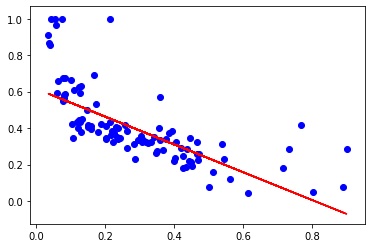

In [55]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

## Back from Normalization

In [56]:
#Reshape to change the shape to the shape that is requied by scaler
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

#When reshaped(scaled back) an extra dimension gets added therefore this is to remove extra dimension
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,27.71,13.2,8.11
1,7.79,36.0,26.97
2,8.20,22.0,26.58
3,4.45,50.0,30.13
4,17.60,17.8,17.68
